In [41]:
#!pip3 install -U pip
#!pip3 install -U setuptools wheel
#!pip3 install autogluon
#!pip install -U -q -r requirements.txt
#!pip install autogluon.tabular

In [42]:
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.impute import SimpleImputer #impute the missing values
from sklearn.base import BaseEstimator, TransformerMixin #baseestimator is a class; TransformerMixin: mix fit and trandform explicitly.
#uses fit() and transform()
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df_titanic =  pd.read_csv('/Users/brblove/OneDrive/University Life staff/IT Portfolio Projects/Projects/Titanic-Machine-Learning-from-Disaster/train.csv')

In [44]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
df_titanic["Sex"] = (df_titanic["Sex"] == "male").astype(int) #change gender to integer

In [48]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


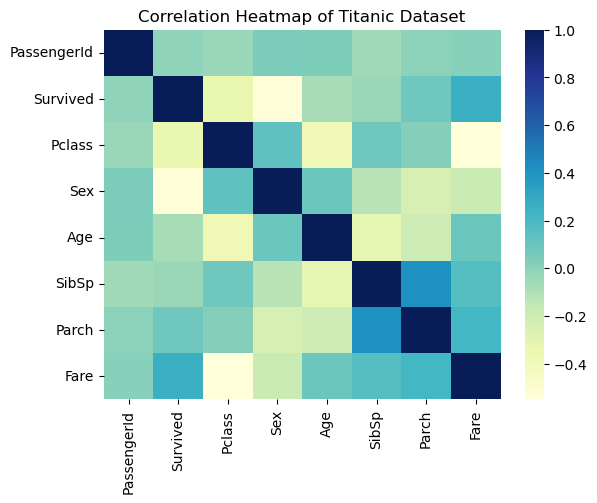

In [49]:
corr_titanic = df_titanic.corr(numeric_only=True)
sns.heatmap(corr_titanic, cmap="YlGnBu")
plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3)
for train_indices, test_indices in split.split(df_titanic, df_titanic[["Survived", "Pclass", "Sex"]]):
    strat_train_set = df_titanic.loc[train_indices]
    strat_test_set = df_titanic.loc[test_indices]

In [51]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
797,798,1,3,"Osman, Mrs. Mara",0,31.0,0,0,349244,8.6833,NaN,S
713,714,0,3,"Larsson, Mr. August Viktor",1,29.0,0,0,7545,9.4833,NaN,S
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",1,49.0,1,0,PC 17485,56.9292,A20,C
302,303,0,3,"Johnson, Mr. William Cahoone Jr",1,19.0,0,0,LINE,0.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",1,34.0,0,0,248698,13.0000,D56,S
...,...,...,...,...,...,...,...,...,...,...,...,...
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",0,NaN,0,0,PC 17585,79.2000,NaN,C
127,128,1,3,"Madsen, Mr. Fridtjof Arne",1,24.0,0,0,C 17369,7.1417,NaN,S
749,750,0,3,"Connaghton, Mr. Michael",1,31.0,0,0,335097,7.7500,NaN,Q
353,354,0,3,"Arnold-Franchi, Mr. Josef",1,25.0,1,0,349237,17.8000,NaN,S


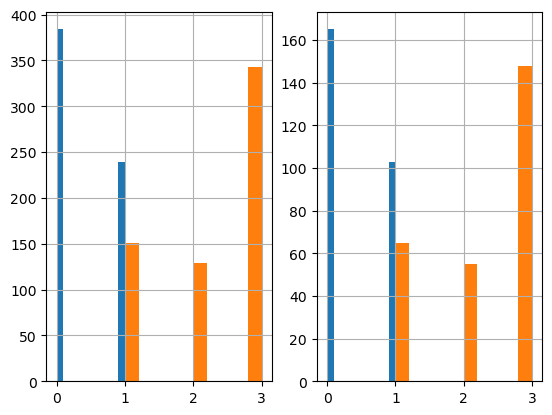

In [52]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [53]:
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): #pass X and y, y value is None always
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy='mean')
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [54]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): # Fit method does not need to do anything for OneHotEncoder
        return self

    def transform(self, X):
        # Create an instance of OneHotEncoder
        encoder = OneHotEncoder()
        # Fit and transform the 'Embarked' column
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        cols = ["C","S","Q","N"]
        for i in range(len(matrix.T)):
            X[cols[i]] = matrix.T[i]
            return X

In [56]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): # Fit method does not need to do anything for OneHotEncoder
        return self

    def transform(self, X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"], axis=1, errors="ignore")